In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import pickle
import random

In [ ]:
import seaborn as sns

In [ ]:
import lightgbm as lgb

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
!pip install jupyter-dash

import plotly
import plotly.graph_objects as go
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 40.0 MB/s 
     |████████████████████████████████| 1.6 MB 43.4 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11448 sha256=f0540b2a58b10f50c7f967575c23ed94a2824e3daa7b95682f996e3ccae680d8
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!cp /content/gdrive/MyDrive/git_projects/plastic_extruder/plastic_extruder/extrusion.csv /content/

In [ ]:
df = pd.read_csv ('extrusion.csv')
df

,Datum,ST0_VARActAuftrag,ST110_VARExtr_0_HeizungZone_3_Regler_Y,ST110_VARExtr_0_HeizungZone_3_SollTemp,ST110_VARExtr_0_HeizungZone_4_Konfig,ST110_VARExtr_0_HeizungZone_4_Regler_X,ST110_VARExtr_0_HeizungZone_4_Regler_Y,ST110_VARExtr_0_HeizungZone_4_SollTemp,ST110_VARExtr_0_HeizungZone_5_Konfig,ST110_VARExtr_0_HeizungZone_5_Regler_X,...,ST114_VARTensPlusSp,ST114_VARTotalLen,ST114_VARTotalRolls,ST114_VARWdCloseCmd,ST114_VARWdSpeedHMI,ST114_VARWdSpSpeed,ST114_VARWdSpTens,ST114_VARWdTapeNum,ST114_VARWdTapeReductVal,ST114_VARWdTensVis
0,25.06.2018 4:40,0.0,9.0,190.0,1.0,193.0,0.0,190.0,1.0,190.0,...,21.0,3544103.0,2174.0,1.0,78.0,0.0,50.0,5.0,15.0,53.0
1,25.06.2018 4:42,0.0,9.0,190.0,1.0,193.0,0.0,190.0,1.0,190.0,...,21.0,3544103.0,2174.0,1.0,81.0,0.0,50.0,5.0,15.0,49.0
2,25.06.2018 4:45,0.0,9.0,190.0,1.0,193.0,0.0,190.0,1.0,190.0,...,21.0,3544103.0,2174.0,1.0,81.0,0.0,50.0,5.0,15.0,48.0
3,25.06.2018 4:47,0.0,10.0,190.0,1.0,193.0,0.0,190.0,1.0,190.0,...,21.0,3544103.0,2174.0,1.0,81.0,0.0,50.0,5.0,15.0,50.0
4,25.06.2018 4:49,0.0,11.0,190.0,1.0,193.0,0.0,190.0,1.0,190.0,...,21.0,3544103.0,2174.0,1.0,81.0,0.0,50.0,5.0,15.0,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226531,25.06.2019 6:36,0.0,2.0,165.0,1.0,170.0,0.0,165.0,1.0,165.0,...,22.0,799185.0,387.0,1.0,57.0,0.0,55.0,5.0,15.0,51.0
226532,25.06.2019 6:38,0.0,2.0,165.0,1.0,170.0,0.0,165.0,1.0,165.0,...,22.0,799185.0,387.0,1.0,56.0,0.0,55.0,5.0,15.0,51.0
226533,25.06.2019 6:40,0.0,2.0,165.0,1.0,170.0,0.0,165.0,1.0,165.0,...,22.0,799185.0,387.0,1.0,57.0,0.0,55.0,5.0,15.0,51.0
226534,25.06.2019 6:42,0.0,2.0,165.0,1.0,170.0,0.0,165.0,1.0,165.0,...,22.0,799185.0,387.0,1.0,56.0,0.0,55.0,5.0,15.0,51.0


In [ ]:
df['date'] = pd.to_datetime(df['Datum'], format="%d.%m.%Y %H:%M")
df

,Datum,ST0_VARActAuftrag,ST110_VARExtr_0_HeizungZone_3_Regler_Y,ST110_VARExtr_0_HeizungZone_3_SollTemp,ST110_VARExtr_0_HeizungZone_4_Konfig,ST110_VARExtr_0_HeizungZone_4_Regler_X,ST110_VARExtr_0_HeizungZone_4_Regler_Y,ST110_VARExtr_0_HeizungZone_4_SollTemp,ST110_VARExtr_0_HeizungZone_5_Konfig,ST110_VARExtr_0_HeizungZone_5_Regler_X,...,ST114_VARTotalLen,ST114_VARTotalRolls,ST114_VARWdCloseCmd,ST114_VARWdSpeedHMI,ST114_VARWdSpSpeed,ST114_VARWdSpTens,ST114_VARWdTapeNum,ST114_VARWdTapeReductVal,ST114_VARWdTensVis,date
0,25.06.2018 4:40,0.0,9.0,190.0,1.0,193.0,0.0,190.0,1.0,190.0,...,3544103.0,2174.0,1.0,78.0,0.0,50.0,5.0,15.0,53.0,2018-06-25 04:40:00
1,25.06.2018 4:42,0.0,9.0,190.0,1.0,193.0,0.0,190.0,1.0,190.0,...,3544103.0,2174.0,1.0,81.0,0.0,50.0,5.0,15.0,49.0,2018-06-25 04:42:00
2,25.06.2018 4:45,0.0,9.0,190.0,1.0,193.0,0.0,190.0,1.0,190.0,...,3544103.0,2174.0,1.0,81.0,0.0,50.0,5.0,15.0,48.0,2018-06-25 04:45:00
3,25.06.2018 4:47,0.0,10.0,190.0,1.0,193.0,0.0,190.0,1.0,190.0,...,3544103.0,2174.0,1.0,81.0,0.0,50.0,5.0,15.0,50.0,2018-06-25 04:47:00
4,25.06.2018 4:49,0.0,11.0,190.0,1.0,193.0,0.0,190.0,1.0,190.0,...,3544103.0,2174.0,1.0,81.0,0.0,50.0,5.0,15.0,51.0,2018-06-25 04:49:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226531,25.06.2019 6:36,0.0,2.0,165.0,1.0,170.0,0.0,165.0,1.0,165.0,...,799185.0,387.0,1.0,57.0,0.0,55.0,5.0,15.0,51.0,2019-06-25 06:36:00
226532,25.06.2019 6:38,0.0,2.0,165.0,1.0,170.0,0.0,165.0,1.0,165.0,...,799185.0,387.0,1.0,56.0,0.0,55.0,5.0,15.0,51.0,2019-06-25 06:38:00
226533,25.06.2019 6:40,0.0,2.0,165.0,1.0,170.0,0.0,165.0,1.0,165.0,...,799185.0,387.0,1.0,57.0,0.0,55.0,5.0,15.0,51.0,2019-06-25 06:40:00
226534,25.06.2019 6:42,0.0,2.0,165.0,1.0,170.0,0.0,165.0,1.0,165.0,...,799185.0,387.0,1.0,56.0,0.0,55.0,5.0,15.0,51.0,2019-06-25 06:42:00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226536 entries, 0 to 226535
Columns: 471 entries, Datum to date
dtypes: datetime64[ns](1), float64(469), object(1)
memory usage: 814.0+ MB


In [ ]:
df.describe()

,ST0_VARActAuftrag,ST110_VARExtr_0_HeizungZone_3_Regler_Y,ST110_VARExtr_0_HeizungZone_3_SollTemp,ST110_VARExtr_0_HeizungZone_4_Konfig,ST110_VARExtr_0_HeizungZone_4_Regler_X,ST110_VARExtr_0_HeizungZone_4_Regler_Y,ST110_VARExtr_0_HeizungZone_4_SollTemp,ST110_VARExtr_0_HeizungZone_5_Konfig,ST110_VARExtr_0_HeizungZone_5_Regler_X,ST110_VARExtr_0_HeizungZone_5_Regler_Y,...,ST114_VARTensPlusSp,ST114_VARTotalLen,ST114_VARTotalRolls,ST114_VARWdCloseCmd,ST114_VARWdSpeedHMI,ST114_VARWdSpSpeed,ST114_VARWdSpTens,ST114_VARWdTapeNum,ST114_VARWdTapeReductVal,ST114_VARWdTensVis
count,226536.0,226474.000000,226474.000000,226474.0,226474.000000,226474.000000,226474.000000,226474.0,226474.000000,226474.000000,...,225435.000000,2.254350e+05,225435.000000,225435.000000,225435.000000,225435.0,225435.000000,225435.0,225435.0,225435.00000
mean,0.0,3.033558,176.069761,1.0,184.111399,0.565540,176.237815,1.0,176.359344,11.219849,...,21.104620,1.127531e+06,709.736514,0.793998,57.329057,0.0,69.033584,5.0,15.0,57.27753
std,0.0,7.461482,16.550270,0.0,21.348341,3.585595,16.569598,0.0,20.954396,9.545225,...,0.306064,1.409486e+06,920.508457,0.404433,32.022970,0.0,23.117881,0.0,0.0,31.43569
min,0.0,0.000000,100.000000,1.0,14.000000,0.000000,100.000000,1.0,10.000000,0.000000,...,21.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,40.000000,5.0,15.0,-4.00000
25%,0.0,0.000000,172.000000,1.0,180.000000,0.000000,172.000000,1.0,173.000000,3.000000,...,21.000000,1.691720e+05,102.000000,1.000000,31.000000,0.0,55.000000,5.0,15.0,49.00000
50%,0.0,0.000000,178.000000,1.0,186.000000,0.000000,178.000000,1.0,180.000000,11.000000,...,21.000000,5.182820e+05,291.000000,1.000000,73.000000,0.0,60.000000,5.0,15.0,58.00000
75%,0.0,3.000000,180.000000,1.0,191.000000,0.000000,182.000000,1.0,185.000000,17.000000,...,21.000000,1.404420e+06,889.000000,1.000000,83.000000,0.0,75.000000,5.0,15.0,67.00000
max,0.0,100.000000,250.000000,1.0,253.000000,100.000000,250.000000,1.0,254.000000,100.000000,...,22.000000,5.898309e+06,3860.000000,1.000000,100.000000,0.0,230.000000,5.0,15.0,302.00000


## Importance of thickness
In case of thin film extruder film thickness is very important. 
When film thickness is 0 it indicates that the production is stopped. From the data it indicate that extruder is multilayer extrudr system."ST110_VAREx_1_SDickeIst", "ST110_VAREx_2_SDickeIst", "ST110_VAREx_3_SDickeIst" are the thickness of films from extruder_1(extruder A), extruder _2(extruder B) and extruder_3(Extruder C). "ST110_VAREx_0_SDickeIst" is the final thickness of the extruder_0(main extruder) films and most important parameter.

In [ ]:
df2 = df[["ST110_VAREx_0_SDickeIst", "ST110_VAREx_1_SDickeIst", "ST110_VAREx_2_SDickeIst", "ST110_VAREx_3_SDickeIst"]]
df2

,ST110_VAREx_0_SDickeIst,ST110_VAREx_1_SDickeIst,ST110_VAREx_2_SDickeIst,ST110_VAREx_3_SDickeIst
0,28.9,5.7,17.3,6.0
1,29.0,5.8,17.4,5.8
2,29.0,5.8,17.4,5.8
3,28.9,5.8,17.4,5.8
4,29.1,5.8,17.5,5.8
...,...,...,...,...
226531,38.8,9.7,19.2,9.8
226532,39.1,9.7,19.6,9.8
226533,39.2,9.7,19.6,9.8
226534,38.8,9.7,19.3,9.7


In [ ]:
df2.describe()

,ST110_VAREx_0_SDickeIst,ST110_VAREx_1_SDickeIst,ST110_VAREx_2_SDickeIst,ST110_VAREx_3_SDickeIst
count,226474.000000,226474.000000,226474.000000,226474.000000
mean,39.219676,9.548634,20.282930,9.390255
std,26.873275,6.948936,13.945361,6.710497
min,0.000000,0.000000,0.000000,0.000000
25%,29.500000,6.200000,14.700000,6.200000
50%,34.200000,7.400000,18.600000,7.400000
75%,44.000000,11.700000,22.200000,11.600000
max,986.500000,287.500000,521.200000,265.200000


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226536 entries, 0 to 226535
Data columns (total 4 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ST110_VAREx_0_SDickeIst  226474 non-null  float64
 1   ST110_VAREx_1_SDickeIst  226474 non-null  float64
 2   ST110_VAREx_2_SDickeIst  226474 non-null  float64
 3   ST110_VAREx_3_SDickeIst  226474 non-null  float64
dtypes: float64(4)
memory usage: 6.9 MB


In [ ]:
df2.describe()

,ST110_VAREx_0_SDickeIst,ST110_VAREx_1_SDickeIst,ST110_VAREx_2_SDickeIst,ST110_VAREx_3_SDickeIst
count,226474.000000,226474.000000,226474.000000,226474.000000
mean,39.219676,9.548634,20.282930,9.390255
std,26.873275,6.948936,13.945361,6.710497
min,0.000000,0.000000,0.000000,0.000000
25%,29.500000,6.200000,14.700000,6.200000
50%,34.200000,7.400000,18.600000,7.400000
75%,44.000000,11.700000,22.200000,11.600000
max,986.500000,287.500000,521.200000,265.200000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fad5a8a1510>,
      dtype=object)

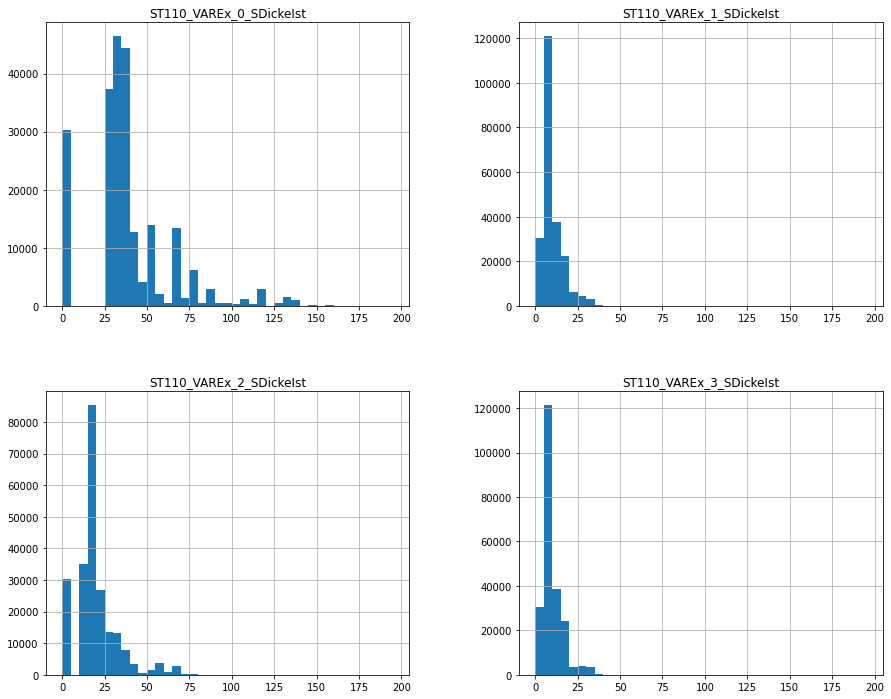

In [ ]:
# plot histogram of thickness 

plt.rcParams['figure.figsize'] = [15, 12]
df.hist(column=["ST110_VAREx_0_SDickeIst", "ST110_VAREx_1_SDickeIst", "ST110_VAREx_2_SDickeIst", "ST110_VAREx_3_SDickeIst"], bins=range(0, 200,5))

All the three extruder and main extruder have around 30000 instances of zero thickness. This indicates that if a problem happends in one extruder all extruders are stopped while correcting it.Some of these instances also could be due to the stoppage for die change and material change.

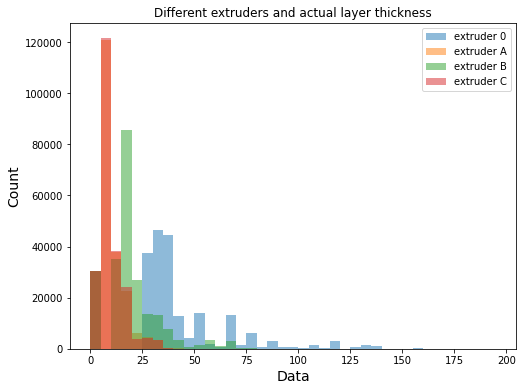

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(df['ST110_VAREx_0_SDickeIst'], bins=range(0, 200,5), alpha=0.5, label="extruder 0")

plt.hist(df['ST110_VAREx_1_SDickeIst'], bins=range(0, 200,5), alpha=0.5, label="extruder A")

plt.hist(df['ST110_VAREx_2_SDickeIst'], bins=range(0, 200,5), alpha=0.5, label="extruder B")

plt.hist(df['ST110_VAREx_3_SDickeIst'], bins=range(0, 200,5), alpha=0.5, label="extruder C")
plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("Different extruders and actual layer thickness")
plt.legend(loc='upper right')

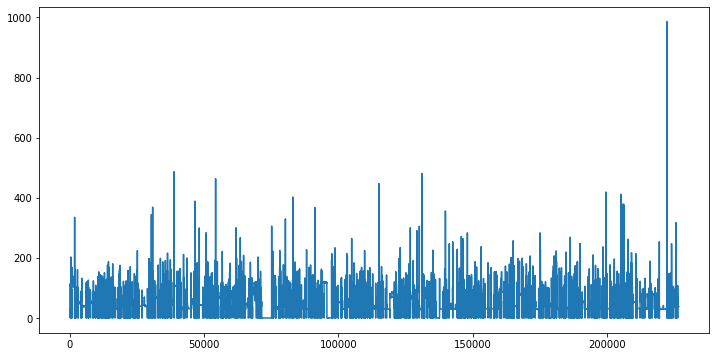

In [ ]:
plt.plot(df['ST110_VAREx_0_SDickeIst'])

# Finding failure sequences

In [ ]:
df['classified'] = np.where(df['ST110_VAREx_0_SDickeIst']== 0, 0, 1)
df['classified']

0         1
1         1
2         1
3         1
4         1
         ..
226531    1
226532    1
226533    1
226534    1
226535    1
Name: classified, Length: 226536, dtype: int64

In [ ]:
df['classified'].value_counts()            

1    196208
0     30328
Name: classified, dtype: int64

In [ ]:
df['classified'] = np.where(df['ST110_VAREx_0_SDickeIst']== 0, 0, 1)
df['classified']count_0 = (df['ST110_VAREx_0_SDickeIst'] == 0).sum()
count_a = (df['ST110_VAREx_0_SDickeIst'] == 0).sum()
count_b = (df['ST110_VAREx_0_SDickeIst'] == 0).sum()
count_c = (df['ST110_VAREx_0_SDickeIst'] == 0).sum()
print('No of zeros in thickness of 0, A, B, C', count_0, count_a, count_b, count_c)

No of zeros in thickness of 0, A, B, C 30328 30328 30328 30328


The counts indicate that all the extruder become zero at same time. Not one after another.

## No of failure sequnces

In [1]:
classified_list = df['classified'].to_list()

NameError: ignored

In [ ]:
len(classified_list)

In [ ]:
#remove repeating adjacent zero when machine is not working by adding a new column
classified_list2 = []
count = 0
for value in classified_list:
    if count == 0:
        classified_list2.append(1)
    else:
        if classified_list[count] == 0:
            count2 = count-1
            if classified_list[count2] == 0:
                classified_list2.append(0)
            else:
                classified_list2.append(1)
        else:
            classified_list2.append(1)
    count = count+1

In [ ]:
count

In [ ]:
len(classified_list2)

In [ ]:
df[610:620]['ST110_VAREx_3_SDickeIst']

In [ ]:
df['classified2'] = classified_list2

In [ ]:
df2 = df[df['classified2'] == 1] #Include only first zero values in case of continuous zero thickness

In [ ]:
df2

In [ ]:
df2['classified'].value_counts()  

This indicates that there are 903 instance of failure or stoppages.

## Position where failure happends

In [ ]:
# to know row number where classified is 0
row_list1= df2[df2['classified'] == 0].index.to_numpy()
row_list1

array([   183,    390,    661,    734,    740,    756,    762,    770,
          780,   1814,   1823,   1830,   1959,   2061,   2209,   2855,
         3128,   4180,   4276,   4322,   4430,   5965,   5992,   6273,
         6899,   6950,   7556,   8459,   8754,   9466,   9580,   9681,
        10245,  10406,  10517,  10796,  10903,  10937,  11385,  11810,
        11841,  11987,  12069,  12163,  12543,  12903,  13206,  13229,
        13259,  13756,  13768,  13798,  13816,  14003,  14031,  14062,
        14176,  14205,  14220,  14376,  14389,  14650,  14707,  15328,
        15800,  15847,  15862,  15875,  15965,  16747,  16755,  17814,
        17823,  18311,  18367,  18395,  18401,  18429,  18451,  18455,
        18461,  18481,  18504,  18511,  18633,  18692,  19063,  19877,
        19975,  20305,  20548,  20631,  20638,  20649,  20886,  20952,
        20974,  20980,  21291,  21311,  21435,  21629,  21704,  21784,
        21813,  21828,  21970,  22112,  22129,  22279,  22457,  22520,
      

In [ ]:
# save the problem rows as a new spreadsheet for analysis
df3 = df2.loc[178:188]
df4 = df2.loc[385:395]

In [ ]:
df4['ST110_VAREx_0_SDickeIst']

385    29.1
386    29.0
387    29.1
388    29.0
389    29.0
390     0.0
Name: ST110_VAREx_0_SDickeIst, dtype: float64

In [ ]:
 df2_re = df2.reset_index(drop=True) #reindexing as only first row with zero thickness included

In [ ]:
df4_re = df2_re.loc[178:188]
df4_re['ST110_VAREx_0_SDickeIst']

178     29.1
179     29.0
180     29.0
181     29.0
182     29.0
183      0.0
184    113.6
185     91.9
186    100.0
187     96.5
188    114.4
Name: ST110_VAREx_0_SDickeIst, dtype: float64

In [ ]:
# to know row number where classified is 0 after reindexing
row_list1_re= df2_re[df2_re['classified'] == 0].index.to_numpy()
row_list1_re

array([   183,    382,    614,    623,    625,    630,    635,    637,
          647,   1681,   1685,   1688,   1817,   1833,   1887,   2516,
         2770,   3781,   3872,   3914,   4017,   5524,   5527,   5808,
         6374,   6420,   6994,   7870,   8149,   8826,   8903,   8931,
         9487,   9590,   9690,   9961,  10025,  10044,  10427,  10850,
        10875,  11014,  11063,  11088,  11438,  11789,  12083,  12095,
        12120,  12608,  12610,  12640,  12649,  12831,  12839,  12866,
        12978,  13001,  13011,  13157,  13166,  13425,  13458,  14076,
        14538,  14582,  14591,  14601,  14685,  15458,  15462,  16514,
        16518,  17006,  17008,  17033,  17037,  17048,  17068,  17070,
        17073,  17092,  17095,  17101,  17116,  17136,  17480,  18283,
        18290,  18618,  18831,  18833,  18840,  18849,  19074,  19090,
        19107,  19109,  19417,  19430,  19550,  19689,  19717,  19789,
        19810,  19812,  19953,  20092,  20101,  20249,  20415,  20472,
      

### Failure at 382 closer look

In [2]:
df3_re = df2_re.loc[375:395]
df3_re['ST110_VAREx_0_SDickeIst']

NameError: ignored

In [3]:
pd.options.plotting.backend = "plotly"
df3_re_ext = df2_re.loc[150:1300]
df3_re_ext.plot(x=df3_re_ext.index, y = ['ST110_VAREx_0_SDickeIst','ST110_VAREx_1_SDickeIst',
                                 'ST110_VAREx_2_SDickeIst','ST110_VAREx_3_SDickeIst' ])

NameError: ignored

In [ ]:
#plotting with time
pd.options.plotting.backend = "plotly"
df3_re_ext = df2_re.loc[150:1300]
df3_re_ext.plot(x=df3_re_ext.date, y = ['ST110_VAREx_0_SDickeIst','ST110_VAREx_1_SDickeIst',
                                 'ST110_VAREx_2_SDickeIst','ST110_VAREx_3_SDickeIst' ])

In [ ]:
#plotting original
df4_re_ext = df.loc[150:1500]
df4_re_ext.plot(x=df4_re_ext.date, y = ['ST110_VAREx_0_SDickeIst','ST110_VAREx_1_SDickeIst',
                                 'ST110_VAREx_2_SDickeIst','ST110_VAREx_3_SDickeIst' ])

In [ ]:
#plotting original
df4_re_ext = df.loc[150:1500]
df4_re_ext.plot(x=df4_re_ext.index, y = ['ST110_VAREx_0_SDickeIst','ST110_VAREx_1_SDickeIst',
                                 'ST110_VAREx_2_SDickeIst','ST110_VAREx_3_SDickeIst' ])

Problem June 25 18:43, June 26 4:30 could be due to dimension change. While problem at June 27 7:29 clearly an anomaly. Problem June 26 1:00 AM is not clearly an anomaly.

In [ ]:
#plotting original
df4_re_ext = df.loc[10000:11500]
df4_re_ext.plot(x=df4_re_ext.date, y = ['ST110_VAREx_0_SDickeIst','ST110_VAREx_1_SDickeIst',
                                 'ST110_VAREx_2_SDickeIst','ST110_VAREx_3_SDickeIst' ])

short stops at july 10 20:23 and 00:23 could be due to problems as the machine continued with same thickness afterwards. Similarly problem at july 12 7:44 also due to problems as the machine continue afterwards with same dimensions.

It seems stopping at 382 was for dimension change

In [ ]:
df3_re = df2_re.loc[0:1000]

In [ ]:
len(row_list1_re)

In [ ]:
# Removing multiple values from a single event by removing closer failure event
c1 = 1
row_list1_re_f1 = []

while c1 < len(row_list1_re):
  c2 = c1 - 1 
  if c1 == 1:
    row_list1_re_f1.append(row_list1_re[0])      # adding the first value

  n1 = row_list1_re[c1]
  n2 = row_list1_re[c2]
  d = abs(n2-n1)
  if d > 20:
    row_list1_re_f1.append(row_list1_re[c1])
  c1 = c1+1

In [4]:
len(row_list1_re_f1)

NameError: ignored

In [ ]:
row_list1_re2 = row_list1_re_f1[:20]

In [ ]:
# Removing failures due to dimension changes
row_list1_re2_f2 = []
for tpoint in row_list1_re_f1:
  n1 = tpoint - 100
  n2 = tpoint - 50
  n3 = tpoint + 100
  n4 = tpoint + 150
  values_before = df2_re.ST110_VAREx_0_SDickeIst[n1:n2]
  values_after = df2_re.ST110_VAREx_0_SDickeIst[n3:n4]
  avg1 = values_before.mean()
  avg2 = values_after.mean()
  d_avg = abs(avg1-avg2)
  if d_avg < 2:
    row_list1_re2_f2.append(tpoint)

  

In [ ]:
row_list1_re2_f2[:20]

In [ ]:
len(row_list1_re2_f2)

In [ ]:
filename = 'row_list1_re2_f2.sav'
pickle.dump(row_list1_re2_f2, open(filename, 'wb'))

In [ ]:
!cp /content/row_list1_re2_f2.sav /content/gdrive/MyDrive/git_projects/plastic_extruder/plastic_extruder/ 

Originally there were 903 cases of stoppage. Filter one removed very closer stoppages as probably due to the same reason or while solving the problems. After removing closer stoppages there were only 608 cases. However, we found that many of the stoppages due to dimension changes. After removing the stoppages due to dimension changes there were only 222 stoppages.

# Prepare 222 points of stoppages for further classification studies

In [ ]:
# generate sequuences without stoppage for machine learning comparison
#make same number random numbers 
row_list2=[]
for i in range(2000):
  r=random.randint(1,197110)
  if r not in row_list2: row_list2.append(r)

In [ ]:
len(row_list2)              

1980

In [ ]:
row_list2.sort()
row_list2[:10]


[124, 193, 548, 676, 871, 1115, 1161, 1197, 1213, 1287]

In [ ]:
#check any zero values in randomly selected points
zero_val = []
for numb in row_list2:
  i=0
  while i<20:
    numb2 = numb-i
    if df2_re.ST110_VAREx_0_SDickeIst[numb2] == 0:
      if numb not in zero_val: zero_val.append(numb)
      #zero_val.append(numb)
      #row_list2.remove(numb)

    i = i+1     

In [ ]:
zero_val[:10]

[193, 3788, 7013, 10878, 11454, 12087, 12836, 13442, 14691, 17008]

In [ ]:
len(zero_val)

127

In [ ]:
#plotting a zero value point
pd.options.plotting.backend = "plotly"
df3_re_ext = df2_re.loc[3733:3823]
df3_re_ext.plot(x=df3_re_ext.index, y = ['ST110_VAREx_0_SDickeIst','ST110_VAREx_1_SDickeIst',
                                 'ST110_VAREx_2_SDickeIst','ST110_VAREx_3_SDickeIst' ])

In [ ]:
row_list2_f1 = list(set(row_list2) - set(zero_val))

## Combining filtered random points with filtered stoppage points

In [ ]:
len(row_list2_f1)

1853

In [ ]:
type(row_list2_f1[10])

int

In [ ]:
type(row_list1_re2_f2[10])

numpy.int64

In [ ]:
print(row_list1_re2_f2[:10])
print(row_list2_f1[:10])

[183, 5524, 5808, 6374, 6420, 7870, 9487, 10427, 10850, 11438]
[167936, 126977, 73730, 122882, 122883, 57352, 69646, 122896, 73747, 57369]


In [ ]:
#convert type numpy.int64 to int for combining
row_list1_re2_f2_conv = []
for values in row_list1_re2_f2:
  pyval = values.item()
  row_list1_re2_f2_conv.append(pyval)
type(row_list1_re2_f2_conv[10])

int

## Combining lists

In [ ]:
row_list_comb= []
row_list_comb = row_list2_f1 + row_list1_re2_f2_conv
row_list_comb.sort()
row_list_comb[:10]

[124, 183, 548, 676, 871, 1115, 1161, 1197, 1213, 1287]

In [ ]:
len(row_list_comb)

2075

In [ ]:
df2_re

,Datum,ST0_VARActAuftrag,ST110_VARExtr_0_HeizungZone_3_Regler_Y,ST110_VARExtr_0_HeizungZone_3_SollTemp,ST110_VARExtr_0_HeizungZone_4_Konfig,ST110_VARExtr_0_HeizungZone_4_Regler_X,ST110_VARExtr_0_HeizungZone_4_Regler_Y,ST110_VARExtr_0_HeizungZone_4_SollTemp,ST110_VARExtr_0_HeizungZone_5_Konfig,ST110_VARExtr_0_HeizungZone_5_Regler_X,...,ST114_VARWdCloseCmd,ST114_VARWdSpeedHMI,ST114_VARWdSpSpeed,ST114_VARWdSpTens,ST114_VARWdTapeNum,ST114_VARWdTapeReductVal,ST114_VARWdTensVis,date,classified,classified2
0,25.06.2018 4:40,0.0,9.0,190.0,1.0,193.0,0.0,190.0,1.0,190.0,...,1.0,78.0,0.0,50.0,5.0,15.0,53.0,2018-06-25 04:40:00,1,1
1,25.06.2018 4:42,0.0,9.0,190.0,1.0,193.0,0.0,190.0,1.0,190.0,...,1.0,81.0,0.0,50.0,5.0,15.0,49.0,2018-06-25 04:42:00,1,1
2,25.06.2018 4:45,0.0,9.0,190.0,1.0,193.0,0.0,190.0,1.0,190.0,...,1.0,81.0,0.0,50.0,5.0,15.0,48.0,2018-06-25 04:45:00,1,1
3,25.06.2018 4:47,0.0,10.0,190.0,1.0,193.0,0.0,190.0,1.0,190.0,...,1.0,81.0,0.0,50.0,5.0,15.0,50.0,2018-06-25 04:47:00,1,1
4,25.06.2018 4:49,0.0,11.0,190.0,1.0,193.0,0.0,190.0,1.0,190.0,...,1.0,81.0,0.0,50.0,5.0,15.0,51.0,2018-06-25 04:49:00,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197106,25.06.2019 6:36,0.0,2.0,165.0,1.0,170.0,0.0,165.0,1.0,165.0,...,1.0,57.0,0.0,55.0,5.0,15.0,51.0,2019-06-25 06:36:00,1,1
197107,25.06.2019 6:38,0.0,2.0,165.0,1.0,170.0,0.0,165.0,1.0,165.0,...,1.0,56.0,0.0,55.0,5.0,15.0,51.0,2019-06-25 06:38:00,1,1
197108,25.06.2019 6:40,0.0,2.0,165.0,1.0,170.0,0.0,165.0,1.0,165.0,...,1.0,57.0,0.0,55.0,5.0,15.0,51.0,2019-06-25 06:40:00,1,1
197109,25.06.2019 6:42,0.0,2.0,165.0,1.0,170.0,0.0,165.0,1.0,165.0,...,1.0,56.0,0.0,55.0,5.0,15.0,51.0,2019-06-25 06:42:00,1,1


## Correlation studies

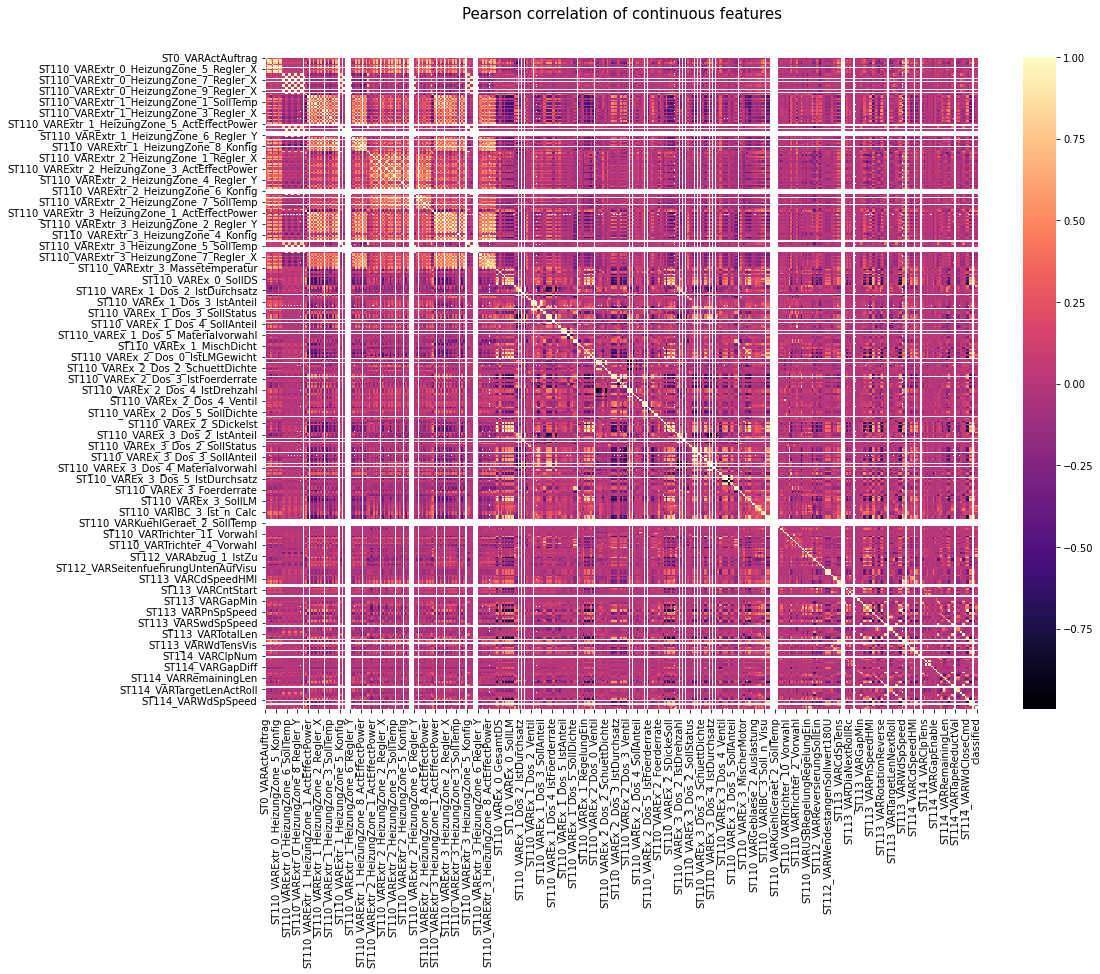

In [ ]:
 colormap = plt.cm.magma
 plt.figure(figsize=(16,12))
 plt.title('Pearson correlation of continuous features', y=1.05, size=15)
 sns.heatmap(df2_re.corr(), cmap=colormap)

In [ ]:
corr_a1 = df2_re.corr()

In [ ]:
corr_a1

,ST0_VARActAuftrag,ST110_VARExtr_0_HeizungZone_3_Regler_Y,ST110_VARExtr_0_HeizungZone_3_SollTemp,ST110_VARExtr_0_HeizungZone_4_Konfig,ST110_VARExtr_0_HeizungZone_4_Regler_X,ST110_VARExtr_0_HeizungZone_4_Regler_Y,ST110_VARExtr_0_HeizungZone_4_SollTemp,ST110_VARExtr_0_HeizungZone_5_Konfig,ST110_VARExtr_0_HeizungZone_5_Regler_X,ST110_VARExtr_0_HeizungZone_5_Regler_Y,...,ST114_VARTotalRolls,ST114_VARWdCloseCmd,ST114_VARWdSpeedHMI,ST114_VARWdSpSpeed,ST114_VARWdSpTens,ST114_VARWdTapeNum,ST114_VARWdTapeReductVal,ST114_VARWdTensVis,classified,classified2
ST0_VARActAuftrag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ST110_VARExtr_0_HeizungZone_3_Regler_Y,NaN,1.000000,0.304567,NaN,0.000256,0.498548,0.286779,NaN,0.230417,0.541462,...,0.026483,-0.142667,-0.064369,NaN,-0.088173,NaN,NaN,-0.122361,-0.038940,NaN
ST110_VARExtr_0_HeizungZone_3_SollTemp,NaN,0.304567,1.000000,NaN,0.755374,0.217051,0.989695,NaN,0.898508,0.443524,...,0.044529,0.042151,-0.014777,NaN,0.079254,NaN,NaN,0.116216,0.014104,NaN
ST110_VARExtr_0_HeizungZone_4_Konfig,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ST110_VARExtr_0_HeizungZone_4_Regler_X,NaN,0.000256,0.755374,NaN,1.000000,0.104833,0.769859,NaN,0.845731,-0.084047,...,0.073824,0.071585,-0.270082,NaN,0.383627,NaN,NaN,0.394456,0.028721,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ST114_VARWdTapeNum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ST114_VARWdTapeReductVal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ST114_VARWdTensVis,NaN,-0.122361,0.116216,NaN,0.394456,-0.003534,0.121001,NaN,0.257121,-0.262490,...,0.078318,0.255444,-0.327067,NaN,0.749538,NaN,NaN,1.000000,0.126364,NaN
classified,NaN,-0.038940,0.014104,NaN,0.028721,-0.032124,0.014015,NaN,0.023720,0.003243,...,0.004251,0.213530,0.176818,NaN,-0.002009,NaN,NaN,0.126364,1.000000,NaN


In [ ]:
corr_a1.iloc[0][0]

nan

In [ ]:
 corr_a1 = corr_a1.sort_values(["ST110_VAREx_0_SDickeIst"], ascending =  False)

In [ ]:
corr_a1.ST110_VAREx_0_SDickeIst[:25]

ST110_VAREx_0_SDickeIst             1.000000
ST110_VAREx_3_SDickeIst             0.967297
ST110_VAREx_2_SDickeIst             0.965558
ST110_VAREx_1_SDickeIst             0.949861
ST110_VAREx_0_Dos_0_IstLMGewicht    0.947211
ST110_VAREx_2_Dos_0_IstLMGewicht    0.942232
ST110_VAREx_1_Dos_0_IstLMGewicht    0.925436
ST110_VAREx_3_Dos_0_IstLMGewicht    0.922414
ST110_VAREx_0_SDickeSoll            0.870928
ST110_VAREx_3_SDickeSoll            0.860307
ST110_VAREx_0_SollLM                0.850123
ST110_VAREx_3_SollLM                0.849394
ST110_VAREx_2_SDickeSoll            0.848062
ST110_VAREx_1_SollLM                0.847534
ST110_VAREx_1_SDickeSoll            0.842365
ST110_VAREx_2_SollLM                0.839330
ST110_VARKorb_dSoll_d               0.692102
ST110_VARKorb_dIst_d                0.688964
ST113_VARRemainingTimeVis           0.673121
ST114_VARWdSpTens                   0.664013
ST113_VARPnSpTens                   0.623859
ST110_VAREx_3_Dos_3_Ventil          0.612377
ST110_VARE

ST110_VAREx_0_SDickeIst  actual layer thicknesses not controllable ST110_VAREx_3_SDickeIst             
ST110_VAREx_2_SDickeIst            
ST110_VAREx_1_SDickeIst 

ST110_VAREx_0_Dos_0_IstLMGewicht actual weight from sensor not controllable mostly measured after the problem happened.
ST110_VAREx_2_Dos_0_IstLMGewicht   
ST110_VAREx_1_Dos_0_IstLMGewicht


SDickeSoll - set layer thickness- retained
ST110_VAREx_0_SollLM - Output in linear meters- removed  
ST110_VARKorb_dSoll_d - cage diamter set  
ST110_VARKorb_dIst_d   - Cage diameter actual  
ST113_VARRemainingTimeVis - winder 1 remaining time current roll  
ST114_VARWdSp - Tens winder 2 winder drum(? Tension)  
ST113_VARPnSpTens- winder 1 primary nip(? Tension)  
ST110_VAREx_3_Dos_3_Ventil- extruder C components 2 valve  
ST114_VARCdSpTens WInder 2 drum Tension  
ST110_VARTrichter_16_Vorwahl- hopper C2 pre-selection


SDickest and IstLMGewicht  are removed for analysis

Thickness of the 3 extruder showed zero readings at similar time. So they are removed from further analysis.

# Preparing data sequences for machine learning

In [ ]:
df5 = df2_re.copy()
df5a = df5.copy()  #storing classified value
df5 = df5.drop(columns=['Datum', 'classified','classified2','date','ST110_VAREx_0_SDickeIst', 'ST110_VAREx_3_SDickeIst', 'ST110_VAREx_2_SDickeIst', 'ST110_VAREx_1_SDickeIst',
'ST110_VAREx_0_Dos_0_IstLMGewicht', 'ST110_VAREx_2_Dos_0_IstLMGewicht', 'ST110_VAREx_1_Dos_0_IstLMGewicht',
'ST110_VAREx_3_Dos_0_IstLMGewicht' ])

In [ ]:
#make sequence 

y_target = []

i=0

for row_n in row_list_comb:
    row_number = row_n-10
    dfa1 = df5.loc[[row_number]]
    dfa2 = df5.loc[[row_number+1]]
    dfa3 = df5.loc[[row_number+2]]
    dfa4 = df5.loc[[row_number+3]]
    dfa5 = df5.loc[[row_number+4]]
    dfa6= df5.loc[[row_number+5]]
    dfa7 = df5.loc[[row_number+6]]
    dfa8= df5.loc[[row_number+7]]
    dfa9= df5.loc[[row_number+8]]
    dfa10= df5.loc[[row_number+9]]
    dfa1 = dfa1.reset_index(drop=True)
    dfa2 = dfa2.reset_index(drop=True)
    dfa3 = dfa3.reset_index(drop=True)
    dfa4 = dfa4.reset_index(drop=True)
    dfa5 = dfa5.reset_index(drop=True)
    dfa6 = dfa6.reset_index(drop=True)
    dfa7 = dfa7.reset_index(drop=True)
    dfa8 = dfa8.reset_index(drop=True)
    dfa9 = dfa9.reset_index(drop=True)
    dfa10 = dfa10.reset_index(drop=True) # removed last point
    
    dfa11 = pd.concat([dfa1,dfa2,dfa3,dfa4,dfa5,dfa6,dfa7,dfa8,dfa9, dfa10], axis=1)
    dfa11 = dfa11.reset_index(drop=True)
    dfa12 = dfa11.loc[[0]]
    if i == 0:
        df7 = dfa12
    else:
        df7 = pd.concat([df7, dfa12], axis=0)
    y_value = df5a.loc[row_number+10]['classified']
    y_target.append(y_value)
    i = i+1


In [ ]:
df7

,ST0_VARActAuftrag,ST110_VARExtr_0_HeizungZone_3_Regler_Y,ST110_VARExtr_0_HeizungZone_3_SollTemp,ST110_VARExtr_0_HeizungZone_4_Konfig,ST110_VARExtr_0_HeizungZone_4_Regler_X,ST110_VARExtr_0_HeizungZone_4_Regler_Y,ST110_VARExtr_0_HeizungZone_4_SollTemp,ST110_VARExtr_0_HeizungZone_5_Konfig,ST110_VARExtr_0_HeizungZone_5_Regler_X,ST110_VARExtr_0_HeizungZone_5_Regler_Y,...,ST114_VARTensPlusSp,ST114_VARTotalLen,ST114_VARTotalRolls,ST114_VARWdCloseCmd,ST114_VARWdSpeedHMI,ST114_VARWdSpSpeed,ST114_VARWdSpTens,ST114_VARWdTapeNum,ST114_VARWdTapeReductVal,ST114_VARWdTensVis
0,0.0,10.0,190.0,1.0,193.0,0.0,190.0,1.0,190.0,22.0,...,21.0,3564880.0,2188.0,1.0,82.0,0.0,53.0,5.0,15.0,53.0
0,0.0,10.0,190.0,1.0,193.0,0.0,190.0,1.0,190.0,22.0,...,21.0,3576430.0,2196.0,1.0,82.0,0.0,53.0,5.0,15.0,53.0
0,0.0,0.0,190.0,1.0,199.0,0.0,190.0,1.0,190.0,9.0,...,21.0,3634569.0,2238.0,1.0,80.0,0.0,50.0,5.0,15.0,50.0
0,0.0,0.0,155.0,1.0,168.0,0.0,155.0,1.0,158.0,0.0,...,21.0,3647756.0,2248.0,1.0,13.0,0.0,120.0,5.0,15.0,120.0
0,0.0,0.0,155.0,1.0,176.0,0.0,155.0,1.0,167.0,0.0,...,21.0,3653545.0,2276.0,1.0,15.0,0.0,120.0,5.0,15.0,117.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.0,0.0,176.0,1.0,192.0,0.0,176.0,1.0,189.0,0.0,...,22.0,765127.0,377.0,1.0,23.0,0.0,140.0,5.0,15.0,100.0
0,0.0,0.0,165.0,1.0,179.0,0.0,165.0,1.0,173.0,0.0,...,22.0,769051.0,381.0,1.0,60.0,0.0,60.0,5.0,15.0,57.0
0,0.0,2.0,165.0,1.0,170.0,0.0,165.0,1.0,165.0,14.0,...,22.0,780611.0,383.0,1.0,60.0,0.0,55.0,5.0,15.0,53.0
0,0.0,2.0,165.0,1.0,170.0,0.0,165.0,1.0,165.0,15.0,...,22.0,799185.0,387.0,1.0,57.0,0.0,55.0,5.0,15.0,54.0


In [ ]:
len(y_target)

2075

In [ ]:
y_target[:10]

[1, 0, 1, 1, 1, 1, 1, 1, 1, 1]

In [ ]:
X = df7.fillna(0)
y = y_target

In [ ]:
df7.to_csv('df7.csv')

In [ ]:
pickle.dump(y_target, open('y_target_df7', 'wb'))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

## Random Forest

In [ ]:
forest_clf2 = RandomForestClassifier()
forest_clf2.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
feat_importances = pd.Series(forest_clf2.feature_importances_, index=df7.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [ ]:
feat_importances.nlargest(20)

ST110_VARUSBRegelungIstwert           0.015952
ST110_VARUSBRegelungPosKlappe         0.013250
ST110_VARIBC_2_Ist_n_Calc             0.011992
ST110_VARIBC_2_Soll_n_Visu            0.009699
ST110_VAREx_0_GesamtDS                0.007755
ST110_VAREx_1_GesamtDS                0.006960
ST113_VARPnSpeedHMI                   0.006550
ST110_VAREx_3_GesamtDS                0.005850
ST113_VARPnTensVis                    0.005791
ST110_VAREx_2_GesamtDS                0.005755
ST113_VARPnCloseCmd                   0.005517
ST114_VARSwdSpeedHMI                  0.003803
ST110_VARExtr_2_druck_1_IstP          0.003610
ST110_VAREx_0_RegelungEin             0.003571
ST112_VARReversierungZeit             0.003454
ST110_VAREx_1_Dos_1_IstFoerderrate    0.003286
ST110_VARExtr_2_druck_1_IstP          0.003236
ST113_VARWdSpeedHMI                   0.003152
ST110_VAREx_1_Dos_2_IstDurchsatz      0.003111
ST110_VARExtr_2_druck_1_IstP          0.003055
dtype: float64

In [ ]:
cross_val_score(forest_clf2, X_train, y_train, cv=3, scoring="accuracy")

array([0.9133574 , 0.91500904, 0.90958409])

In [ ]:
y_pred = forest_clf2.predict(X_test)
precision_score(y_test, y_pred)

0.8858560794044665

In [ ]:
recall_score(y_test, y_pred)

1.0

ST110_VARUSBRegelungIstwert - USB control.actual value  
ST110_VARUSBRegelungPosKlappe - USB Control valve position(%)  
ST110_VARIBC_2_Ist_n_Calc - blower exhaust air actual  
ST110_VARIBC_2_Soll_n_Visu - blower exhaust air set



# After removing the last series values

---



In [ ]:
df5 = df2_re.copy()
df5a = df5.copy()  #storing classified value
df5 = df5.drop(columns=['Datum', 'classified','classified2','date','ST110_VAREx_0_SDickeIst', 'ST110_VAREx_3_SDickeIst', 'ST110_VAREx_2_SDickeIst', 'ST110_VAREx_1_SDickeIst',
'ST110_VAREx_0_Dos_0_IstLMGewicht', 'ST110_VAREx_2_Dos_0_IstLMGewicht', 'ST110_VAREx_1_Dos_0_IstLMGewicht',
'ST110_VAREx_3_Dos_0_IstLMGewicht' ])

In [ ]:
#make sequence 

y_target = []

i=0

for row_n in row_list_comb:
    row_number = row_n-10
    dfa1 = df5.loc[[row_number]]
    dfa2 = df5.loc[[row_number+1]]
    dfa3 = df5.loc[[row_number+2]]
    dfa4 = df5.loc[[row_number+3]]
    dfa5 = df5.loc[[row_number+4]]
    dfa6= df5.loc[[row_number+5]]
    dfa7 = df5.loc[[row_number+6]]
    dfa8= df5.loc[[row_number+7]]
    dfa9= df5.loc[[row_number+8]]
    dfa10= df5.loc[[row_number+9]]
    dfa1 = dfa1.reset_index(drop=True)
    dfa2 = dfa2.reset_index(drop=True)
    dfa3 = dfa3.reset_index(drop=True)
    dfa4 = dfa4.reset_index(drop=True)
    dfa5 = dfa5.reset_index(drop=True)
    dfa6 = dfa6.reset_index(drop=True)
    dfa7 = dfa7.reset_index(drop=True)
    dfa8 = dfa8.reset_index(drop=True)
    dfa9 = dfa9.reset_index(drop=True)
    #dfa10 = dfa10.reset_index(drop=True) # removed last point
    
    dfa11 = pd.concat([dfa1,dfa2,dfa3,dfa4,dfa5,dfa6,dfa7,dfa8,dfa9], axis=1)
    dfa11 = dfa11.reset_index(drop=True)
    dfa12 = dfa11.loc[[0]]
    if i == 0:
        df7 = dfa12
    else:
        df7 = pd.concat([df7, dfa12], axis=0)
    y_value = df5a.loc[row_number+10]['classified']
    y_target.append(y_value)
    i = i+1


In [ ]:
len(y_target)

2075

In [ ]:
X = df7.fillna(0)
y = y_target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

## Random Forest Classifier

In [ ]:
forest_clf2 = RandomForestClassifier()
forest_clf2.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# After removing the last(current) series values
feat_importances = pd.Series(forest_clf2.feature_importances_, index=df7.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [ ]:
# After removing the last(current) series values
feat_importances.nlargest(50)

ST110_VARExtr_2_druck_1_IstP          0.003982
ST110_VARExtr_2_druck_1_IstP          0.003650
ST110_VARExtr_2_druck_1_IstP          0.003475
ST110_VARExtr_2_druck_1_IstP          0.003415
ST113_VARActLen                       0.003324
ST110_VARExtr_2_druck_1_IstP          0.003293
ST110_VARExtr_2_druck_1_IstP          0.003270
ST110_VAREx_3_GesamtDS                0.002886
ST114_VARRemainingLen                 0.002793
ST110_VARTrichter_8_Vorwahl           0.002722
ST110_VARUSBRegelungPosKlappe         0.002688
ST110_VAREx_2_Dos_1_IstFoerderrate    0.002616
ST110_VARGeblaese_2_Auslastung        0.002578
ST110_VARExtr_2_druck_1_IstP          0.002569
ST110_VAREx_2_Dos_2_IstAnteil         0.002548
ST110_VAREx_2_Dos_2_IstDurchsatz      0.002546
ST110_VAREx_2_DissipationPwr          0.002535
ST110_VARExtr_2_druck_1_IstP          0.002516
ST110_VAREx_3_GesamtDS                0.002471
ST110_VAREx_2_Dos_2_IstDurchsatz      0.002441
ST110_VAREx_2_Dos_1_IstFoerderrate    0.002382
ST110_VAREx_2

ST110_VARExtr_2_druck_1_IstP  extruder B melt press.  
ST113_VARActLen - winder 1 current roll actual length  
ST110_VAREx_3_GesamtDS - extruder C output set
ST114_VARRemainingLen - winder 2 remaining length current roll  
ST110_VARTrichter_8_Vorwahl hopper B1 pre-selection

In [ ]:
cross_val_score(forest_clf2, X_train, y_train, cv=3, scoring="accuracy")

array([0.88086643, 0.90235081, 0.89873418])

In [ ]:
y_pred = forest_clf2.predict(X_test)
precision_score(y_test, y_pred)

0.8640776699029126

In [ ]:
recall_score(y_test, y_pred)

0.9971988795518207

# Including thickness parameters form Extruder A, B & C

## Preparing data sequences for machine learning

In [ ]:
df5 = df2_re.copy()
df5a = df5.copy()  #storing classified value
df5 = df5.drop(columns=['Datum', 'classified','classified2','date','ST110_VAREx_0_SDickeIst' ])

In [ ]:
#make sequence 

y_target = []

i=0

for row_n in row_list_comb:
    row_number = row_n-10
    dfa1 = df5.loc[[row_number]]
    dfa2 = df5.loc[[row_number+1]]
    dfa3 = df5.loc[[row_number+2]]
    dfa4 = df5.loc[[row_number+3]]
    dfa5 = df5.loc[[row_number+4]]
    dfa6= df5.loc[[row_number+5]]
    dfa7 = df5.loc[[row_number+6]]
    dfa8= df5.loc[[row_number+7]]
    dfa9= df5.loc[[row_number+8]]
    dfa10= df5.loc[[row_number+9]]
    dfa1 = dfa1.reset_index(drop=True)
    dfa2 = dfa2.reset_index(drop=True)
    dfa3 = dfa3.reset_index(drop=True)
    dfa4 = dfa4.reset_index(drop=True)
    dfa5 = dfa5.reset_index(drop=True)
    dfa6 = dfa6.reset_index(drop=True)
    dfa7 = dfa7.reset_index(drop=True)
    dfa8 = dfa8.reset_index(drop=True)
    dfa9 = dfa9.reset_index(drop=True)
    #dfa10 = dfa10.reset_index(drop=True) # removed as it for predict this point
    
    dfa11 = pd.concat([dfa1,dfa2,dfa3,dfa4,dfa5,dfa6,dfa7,dfa8,dfa9], axis=1)
    dfa11 = dfa11.reset_index(drop=True)
    dfa12 = dfa11.loc[[0]]
    if i == 0:
        df7 = dfa12
    else:
        df7 = pd.concat([df7, dfa12], axis=0)
    y_value = df5a.loc[row_number+10]['classified']
    y_target.append(y_value)
    i = i+1


In [ ]:
df7

,ST0_VARActAuftrag,ST110_VARExtr_0_HeizungZone_3_Regler_Y,ST110_VARExtr_0_HeizungZone_3_SollTemp,ST110_VARExtr_0_HeizungZone_4_Konfig,ST110_VARExtr_0_HeizungZone_4_Regler_X,ST110_VARExtr_0_HeizungZone_4_Regler_Y,ST110_VARExtr_0_HeizungZone_4_SollTemp,ST110_VARExtr_0_HeizungZone_5_Konfig,ST110_VARExtr_0_HeizungZone_5_Regler_X,ST110_VARExtr_0_HeizungZone_5_Regler_Y,...,ST114_VARTensPlusSp,ST114_VARTotalLen,ST114_VARTotalRolls,ST114_VARWdCloseCmd,ST114_VARWdSpeedHMI,ST114_VARWdSpSpeed,ST114_VARWdSpTens,ST114_VARWdTapeNum,ST114_VARWdTapeReductVal,ST114_VARWdTensVis
0,0.0,10.0,190.0,1.0,193.0,0.0,190.0,1.0,190.0,22.0,...,21.0,3564880.0,2188.0,1.0,82.0,0.0,53.0,5.0,15.0,53.0
0,0.0,10.0,190.0,1.0,193.0,0.0,190.0,1.0,190.0,22.0,...,21.0,3576430.0,2196.0,1.0,82.0,0.0,53.0,5.0,15.0,53.0
0,0.0,0.0,190.0,1.0,199.0,0.0,190.0,1.0,190.0,9.0,...,21.0,3634569.0,2238.0,1.0,80.0,0.0,50.0,5.0,15.0,50.0
0,0.0,0.0,155.0,1.0,168.0,0.0,155.0,1.0,158.0,0.0,...,21.0,3647756.0,2248.0,1.0,13.0,0.0,120.0,5.0,15.0,120.0
0,0.0,0.0,155.0,1.0,176.0,0.0,155.0,1.0,167.0,0.0,...,21.0,3653545.0,2276.0,1.0,15.0,0.0,120.0,5.0,15.0,117.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.0,0.0,176.0,1.0,192.0,0.0,176.0,1.0,189.0,0.0,...,22.0,765127.0,377.0,1.0,23.0,0.0,140.0,5.0,15.0,100.0
0,0.0,0.0,165.0,1.0,179.0,0.0,165.0,1.0,173.0,0.0,...,22.0,769051.0,381.0,1.0,60.0,0.0,60.0,5.0,15.0,57.0
0,0.0,2.0,165.0,1.0,170.0,0.0,165.0,1.0,165.0,14.0,...,22.0,780611.0,383.0,1.0,60.0,0.0,55.0,5.0,15.0,53.0
0,0.0,2.0,165.0,1.0,170.0,0.0,165.0,1.0,165.0,15.0,...,22.0,799185.0,387.0,1.0,57.0,0.0,55.0,5.0,15.0,54.0


In [ ]:
len(y_target)

2075

In [ ]:
y_target[:10]

[1, 0, 1, 1, 1, 1, 1, 1, 1, 1]

In [ ]:
X = df7.fillna(0)
y = y_target

In [ ]:
df7.to_csv('df7.csv')

In [ ]:
pickle.dump(y_target, open('y_target_df7', 'wb'))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

## Random Forest Classifier

In [ ]:
forest_clf2 = RandomForestClassifier()
forest_clf2.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
feat_importances = pd.Series(forest_clf2.feature_importances_, index=df7.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [ ]:
feat_importances.nlargest(20)

ST110_VARExtr_2_druck_1_IstP          0.005046
ST110_VARExtr_2_druck_1_IstP          0.004345
ST110_VARExtr_2_druck_1_IstP          0.004304
ST110_VARExtr_2_druck_1_IstP          0.004247
ST113_VARActLen                       0.004072
ST110_VARExtr_2_druck_1_IstP          0.003563
ST110_VAREx_2_Dos_2_IstDurchsatz      0.003449
ST110_VARExtr_2_druck_1_IstP          0.003075
ST110_VAREx_1_GesamtDS                0.002883
ST110_VARExtr_2_druck_1_IstP          0.002832
ST110_VAREx_2_Dos_1_IstFoerderrate    0.002814
ST110_VAREx_2_Dos_2_IstDurchsatz      0.002810
ST110_VARExtr_2_druck_1_IstP          0.002677
ST110_VAREx_3_Dos_2_IstAnteil         0.002649
ST110_VARUSBRegelungPosKlappe         0.002577
ST110_VAREx_3_GesamtDS                0.002452
ST110_VARGeblaese_2_Auslastung        0.002399
ST110_VARUSBRegelungPosKlappe         0.002313
ST110_VARExtr_3_druck_1_IstP          0.002297
ST114_VARRemainingLen                 0.002253
dtype: float64

In [ ]:
cross_val_score(forest_clf2, X_train, y_train, cv=3, scoring="accuracy")

array([0.88267148, 0.90235081, 0.89692586])

In [ ]:
y_pred = forest_clf2.predict(X_test)
precision_score(y_test, y_pred)

0.8640776699029126

In [ ]:
recall_score(y_test, y_pred)

0.9971988795518207

ST110_VARUSBRegelungIstwert - USB control.actual value  
ST110_VARUSBRegelungPosKlappe - USB Control valve position(%)  
ST110_VARIBC_2_Ist_n_Calc - blower exhaust air actual  
ST110_VARIBC_2_Soll_n_Visu - blower exhaust air set



Extruder B(2) Pressure variation is one of the main reason for stoppages. The other main reasons are changing the winder rolls 1&2.  

## Model2 Lightgbm

In [ ]:
gbm1 = lgb.LGBMClassifier()

In [ ]:
gbm1.fit(X_train, y_train)

LGBMClassifier()

In [ ]:
y_predict = gbm1.predict(X_test)

In [ ]:
precision_score(y_test, y_predict)

0.8623188405797102

In [ ]:
recall_score(y_test, y_predict)

1.0

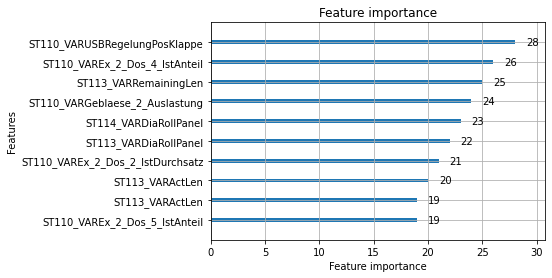

In [ ]:
lgb.plot_importance(gbm1, ax=None, height=0.2, xlim=None, ylim=None, title='Feature importance',
                         xlabel='Feature importance', ylabel='Features', max_num_features=10,)

ST110_VARUSBRegelungPosKlappe -USB regulator valve  
ST110_VAREx_2_Dos_4_lstAnteil extruder B components 3 actual proportion  
ST113_VARRemainingLen - winder 1 current roll reamining length  
ST110_VARGeblaese_2_Auslastung - pellet blower 2 load(Extruder B)  
ST114_VARDiaRollPanel-winder 2 diameter current roll actual  
ST113_VARDiaRollPanel-winder 1 diameter current roll actual  
ST110_VAREx_2_Dos_2_lstDurchsatz extruder B components 1 output actual  
ST113_VARActLen winder 1 current roll actual  
ST110_VAREx_2_Dos_5_lstAnteil extruder B components 4 actual proportion


On closer examination we can see lgbm result matches with that of RandomForest Classifier model. Main causes of extruder stoppages are due to problems in extruder B. Extruder B pressure variation can be due to components proportion variation which may caused by pellet blower. Another cause for stoppages are winder changes. A smooth winder changer system can reduce the number of stoppages due to winder changes.

In [ ]:
#plotting original
df4_re_ext = df.loc[150:1500]
df4_re_ext.plot(x=df4_re_ext.date, y = ['ST110_VAREx_0_SDickeIst','ST110_VARExtr_2_druck_1_IstP',
                                 'ST110_VARUSBRegelungPosKlappe','ST110_VAREx_2_Dos_4_IstAnteil' ])

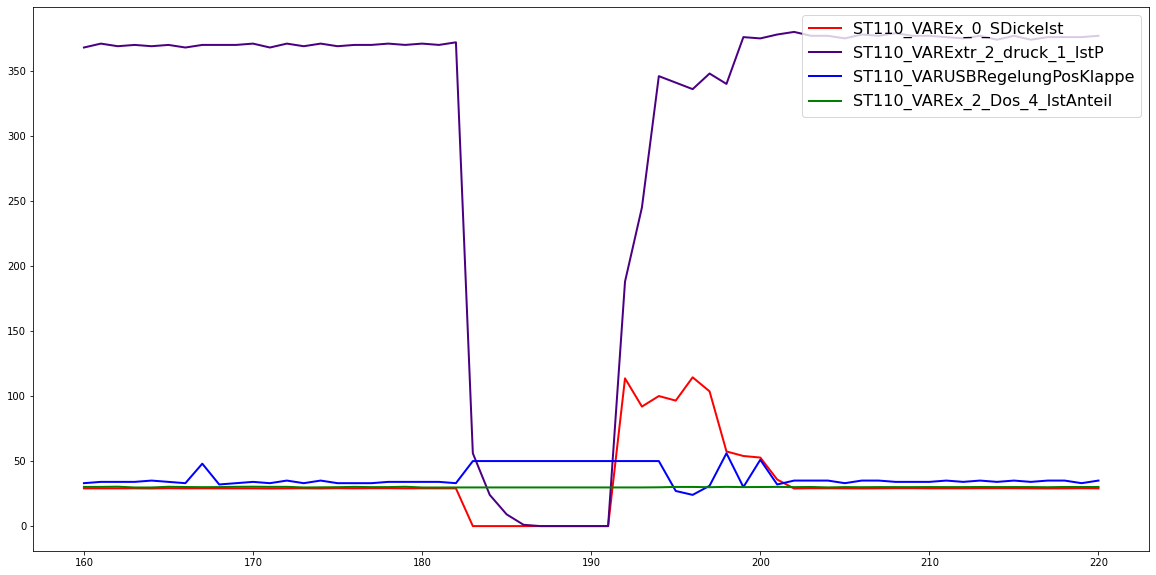

In [ ]:
df4_re_ext = df.loc[160:220]
plt.plot(df4_re_ext.ST110_VAREx_0_SDickeIst, c='red', linewidth=2, label="ST110_VAREx_0_SDickeIst")
plt.plot(df4_re_ext.ST110_VARExtr_2_druck_1_IstP, c='indigo', linewidth=2, label="ST110_VARExtr_2_druck_1_IstP")
plt.plot(df4_re_ext.ST110_VARUSBRegelungPosKlappe, c='blue', linewidth=2, label="ST110_VARUSBRegelungPosKlappe")
plt.plot(df4_re_ext.ST110_VAREx_2_Dos_4_IstAnteil, c='green', linewidth=2, label="ST110_VAREx_2_Dos_4_IstAnteil")

plt.legend(loc="upper right",  prop={'size': 16})
plt.rcParams['figure.figsize']=[20, 10]
plt.show()

This graph of a stoppage shows that the machine is stopped as soon as the problem arised. The analysis including the last value may lead to erroneous results. Analysis in previous section showed that main reasons for stoppages are USB control valve and blower exhaust. This could be due to the stoppage of the system after problem arised.

# After removing one more series values

In [ ]:
df5 = df2_re.copy()
df5a = df5.copy()  #storing classified value
df5 = df5.drop(columns=['Datum', 'classified','classified2','date','ST110_VAREx_0_SDickeIst' ])

In [ ]:
#make sequence 

y_target = []

i=0

for row_n in row_list_comb:
    row_number = row_n-10
    dfa1 = df5.loc[[row_number]]
    dfa2 = df5.loc[[row_number+1]]
    dfa3 = df5.loc[[row_number+2]]
    dfa4 = df5.loc[[row_number+3]]
    dfa5 = df5.loc[[row_number+4]]
    dfa6= df5.loc[[row_number+5]]
    dfa7 = df5.loc[[row_number+6]]
    dfa8= df5.loc[[row_number+7]]
    dfa9= df5.loc[[row_number+8]]
    dfa10= df5.loc[[row_number+9]]
    dfa1 = dfa1.reset_index(drop=True)
    dfa2 = dfa2.reset_index(drop=True)
    dfa3 = dfa3.reset_index(drop=True)
    dfa4 = dfa4.reset_index(drop=True)
    dfa5 = dfa5.reset_index(drop=True)
    dfa6 = dfa6.reset_index(drop=True)
    dfa7 = dfa7.reset_index(drop=True)
    dfa8 = dfa8.reset_index(drop=True)
    #dfa9 = dfa9.reset_index(drop=True) # removed one more point
    #dfa10 = dfa10.reset_index(drop=True) # removed last point
    
    dfa11 = pd.concat([dfa1,dfa2,dfa3,dfa4,dfa5,dfa6,dfa7,dfa8], axis=1)
    dfa11 = dfa11.reset_index(drop=True)
    dfa12 = dfa11.loc[[0]]
    if i == 0:
        df7 = dfa12
    else:
        df7 = pd.concat([df7, dfa12], axis=0)
    y_value = df5a.loc[row_number+10]['classified']
    y_target.append(y_value)
    i = i+1


In [ ]:
df7

,ST0_VARActAuftrag,ST110_VARExtr_0_HeizungZone_3_Regler_Y,ST110_VARExtr_0_HeizungZone_3_SollTemp,ST110_VARExtr_0_HeizungZone_4_Konfig,ST110_VARExtr_0_HeizungZone_4_Regler_X,ST110_VARExtr_0_HeizungZone_4_Regler_Y,ST110_VARExtr_0_HeizungZone_4_SollTemp,ST110_VARExtr_0_HeizungZone_5_Konfig,ST110_VARExtr_0_HeizungZone_5_Regler_X,ST110_VARExtr_0_HeizungZone_5_Regler_Y,...,ST114_VARTensPlusSp,ST114_VARTotalLen,ST114_VARTotalRolls,ST114_VARWdCloseCmd,ST114_VARWdSpeedHMI,ST114_VARWdSpSpeed,ST114_VARWdSpTens,ST114_VARWdTapeNum,ST114_VARWdTapeReductVal,ST114_VARWdTensVis
0,0.0,10.0,190.0,1.0,193.0,0.0,190.0,1.0,190.0,22.0,...,21.0,3564880.0,2188.0,1.0,82.0,0.0,53.0,5.0,15.0,53.0
0,0.0,10.0,190.0,1.0,193.0,0.0,190.0,1.0,190.0,22.0,...,21.0,3576430.0,2196.0,1.0,82.0,0.0,53.0,5.0,15.0,55.0
0,0.0,0.0,190.0,1.0,199.0,0.0,190.0,1.0,190.0,9.0,...,21.0,3634569.0,2238.0,1.0,80.0,0.0,50.0,5.0,15.0,51.0
0,0.0,0.0,155.0,1.0,168.0,0.0,155.0,1.0,158.0,0.0,...,21.0,3647756.0,2248.0,1.0,13.0,0.0,120.0,5.0,15.0,114.0
0,0.0,0.0,155.0,1.0,176.0,0.0,155.0,1.0,167.0,0.0,...,21.0,3653545.0,2276.0,1.0,14.0,0.0,120.0,5.0,15.0,113.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.0,0.0,176.0,1.0,192.0,0.0,176.0,1.0,189.0,0.0,...,22.0,765127.0,377.0,1.0,25.0,0.0,140.0,5.0,15.0,122.0
0,0.0,0.0,165.0,1.0,179.0,0.0,165.0,1.0,173.0,0.0,...,22.0,769051.0,381.0,1.0,60.0,0.0,60.0,5.0,15.0,57.0
0,0.0,2.0,165.0,1.0,170.0,0.0,165.0,1.0,165.0,14.0,...,22.0,780611.0,383.0,1.0,60.0,0.0,55.0,5.0,15.0,52.0
0,0.0,2.0,165.0,1.0,170.0,0.0,165.0,1.0,165.0,15.0,...,22.0,799185.0,387.0,1.0,56.0,0.0,55.0,5.0,15.0,55.0


In [ ]:
len(y_target)

2075

In [ ]:
y_target[:10]

[1, 0, 1, 1, 1, 1, 1, 1, 1, 1]

In [ ]:
X = df7.fillna(0)
y = y_target

In [ ]:
df7.to_csv('df7.csv')

In [ ]:
pickle.dump(y_target, open('y_target_df7', 'wb'))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [ ]:
forest_clf2 = RandomForestClassifier()
forest_clf2.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
feat_importances = pd.Series(forest_clf2.feature_importances_, index=df7.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [ ]:
feat_importances.nlargest(20)

ST110_VARExtr_2_druck_1_IstP          0.005053
ST110_VARExtr_2_druck_1_IstP          0.005031
ST110_VARExtr_2_druck_1_IstP          0.004427
ST110_VARExtr_2_druck_1_IstP          0.004328
ST110_VARExtr_2_druck_1_IstP          0.004036
ST110_VAREx_0_Dos_0_IstLMGewicht      0.003730
ST110_VARExtr_2_druck_1_IstP          0.003619
ST110_VARExtr_2_druck_1_IstP          0.003446
ST110_VAREx_2_Dos_2_IstAnteil         0.002901
ST114_VARDiaRollPanel                 0.002895
ST110_VAREx_2_Dos_1_IstFoerderrate    0.002894
ST110_VAREx_3_GesamtDS                0.002787
ST114_VARDiaRollPanel                 0.002502
ST114_VARCdTensVis                    0.002496
ST110_VARGeblaese_2_Auslastung        0.002422
ST110_VARGeblaese_2_Auslastung        0.002417
ST110_VAREx_2_Dos_1_IstFoerderrate    0.002415
ST110_VARUSBRegelungPosKlappe         0.002294
ST113_VARDiaRollPanel                 0.002223
ST110_VARExtr_1_druck_1_IstP          0.002212
dtype: float64

In [ ]:
cross_val_score(forest_clf2, X_train, y_train, cv=3, scoring="accuracy")

array([0.88267148, 0.90235081, 0.8915009 ])

In [ ]:
y_pred = forest_clf2.predict(X_test)
precision_score(y_test, y_pred)

0.8658536585365854

In [ ]:
recall_score(y_test, y_pred)

0.9943977591036415

Summary 


Failure analysis was performed on extrusion data using machine learning algorithms to reduce the number of stoppages. It was found that main cause of stoppages are due to the pressure variations in extruder B and winder changes as per RandomForest model. Light GBM model also showed that main reason for stoppages are extruder B and winding changes. Extruder B pressure variations could be due to the components proportion variation of components 1&3 which in turn may caused by pellet blower. By reducing the pressure variation of extruder B and ensuring a smooth winder change can reduce the number of stoppages of extruder.